# Analyzing SimData in SpinQuest

## Setup:

To make plots from simulation ROOT files you will need to have installed uproot:
https://uproot.readthedocs.io/

To install:
`pip install uproot`

Plotting is also using other packages such as:
`pip install mplhep`

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import os,sys

## Introduction to Sim information:

## Exploring SimHit data  

Copy ROOT file to the data directory from spinquestgpvm01.fnal.gov
We open this file with uproot and convert it to a pandas df.

In [2]:
# open and convert to panda df
ifile = "sim_eval_Brem_1.04_z500_600_eps_-6.4"
truth = uproot.open("output_electrons/%s.root"%ifile)["Truth"]
truthdf = truth.pandas.df(flatten=False)
# print dataframe
truthdf

,eventID,nHits,hit_detID,hit_elmID,hit_driftdis,hit_pos,hit_detZ,hit_truthx,hit_truthy,hit_truthz,...,gquad_h4y,gquad_dp1,gquad_dp2,gnhits,gndc,gnhodo,gnprop,gnDP,gnH4Y,gelmid
entry,,,,,,,,,,,,,,,,,,,,,
0,0,33,"[1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 13, 14, 1...","[138, 138, 149, 149, 115, 116, 132, 132, 132, ...","[-0.18523438, 0.09018044, -0.056756187, 0.2923...","[23.479063, 23.204641, 30.464064, 30.189642, 2...","[594.58215, 595.21814, 594.58215, 595.21814, 6...","[21.610973, 21.608438, 29.314882, 29.392155, 2...","[9.691644, 9.706221, 8.128711, 8.127162, 10.21...","[594.406, 595.04236, 594.34863, 594.9844, 617....",...,"[2139095039, 2139095039]","[-1028784128, 2139095039]","[-1032323072, 2139095039]","[23, 8]","[18, 6]","[5, 2]","[0, 0]","[3e-45, 0.0]","[0.0, 0.0]","[[2147483647, 138, 138, 115, 116, 132, 132, 21..."
1,1,48,"[1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 13, 14, 1...","[106, 107, 99, 99, 86, 86, 79, 79, 105, 105, 1...","[0.19296113, -0.14391223, -0.24353752, 0.01439...","[3.1590633, 3.5196419, -1.2859367, -1.5603582,...","[594.58215, 595.21814, 594.58215, 595.21814, 6...","[2.0293772, 2.0460393, -1.4124653, -1.4240491,...","[5.8194227, 5.851126, -0.66316926, -0.68523526...","[594.5579, 595.1941, 594.5892, 595.2256, 617.2...",...,"[2139095039, 2139095039]","[-1028653056, 2139095039]","[-1030750208, 2139095039]","[23, 23]","[18, 18]","[5, 5]","[0, 0]","[3e-45, 0.0]","[0.0, 0.0]","[[2147483647, 106, 107, 86, 86, 105, 105, 2147..."
2,2,46,"[1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 13, 14, 1...","[98, 98, 93, 93, 79, 80, 74, 75, 103, 103, 99,...","[-0.17898364, 0.094755754, -0.28194585, -0.040...","[-1.9209367, -2.1953583, -5.095937, -5.370358,...","[594.58215, 595.21814, 594.58215, 595.21814, 6...","[-1.2506795, -1.2503958, -3.7404861, -3.764597...","[-3.7304473, -3.7344742, -7.3522, -7.3920946, ...","[594.59033, 595.2266, 594.61206, 595.2486, 617...",...,"[2139095039, 2139095039]","[2139095039, 2139095039]","[2139095039, 2139095039]","[23, 23]","[18, 18]","[5, 5]","[0, 0]","[0.0, 0.0]","[0.0, 0.0]","[[2147483647, 98, 98, 79, 80, 103, 103, 214748..."
3,3,48,"[1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 13, 14, 1...","[123, 124, 108, 108, 103, 104, 86, 87, 122, 12...","[0.1158406, -0.22314283, -0.22447622, -0.00981...","[13.954063, 14.314642, 4.4290633, 4.1546416, 1...","[594.58215, 595.21814, 594.58215, 595.21814, 6...","[12.971705, 12.9914875, 4.8234067, 4.776143, 1...","[6.188556, 6.1985865, -2.0289838, -2.0873394, ...","[594.4744, 595.1106, 594.5428, 595.1795, 617.2...",...,"[2139095039, 2139095039]","[-1029439488, 2139095039]","[-1033633792, 2139095039]","[23, 23]","[18, 18]","[5, 5]","[0, 0]","[3e-45, 0.0]","[0.0, 0.0]","[[2147483647, 123, 124, 103, 104, 122, 123, 21..."
4,4,32,"[1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 13, 14, 1...","[83, 84, 82, 82, 53, 54, 57, 58, 63, 63, 75, 7...","[0.22086352, -0.14633459, -0.2387029, 0.019562...","[-11.445936, -11.085359, -12.080936, -12.35535...","[594.58215, 595.21814, 594.58215, 595.21814, 6...","[-16.841822, -16.873749, -14.991576, -15.00601...","[21.652843, 21.7557, 9.461388, 9.452431, 25.32...","[594.6891, 595.3256, 594.6845, 595.321, 617.43...",...,"[2139095039, 2139095039]","[1123418112, 2139095039]","[2139095039, 2139095039]","[8, 23]","[6, 18]","[2, 5]","[0, 0]","[1e-45, 0.0]","[0.0, 0.0]","[[2147483647, 83, 84, 53, 54, 63, 63, 21474836..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9993,47,"[1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 13, 14, 1...","[98, 98, 105, 105, 73, 74, 81, 82, 91, 91, 98,...","[-0.27169627, -0.029826846, -0.20086804, 0.085...","[-1.9209367, -2.1953583, 2.5240633, 2.249642, ...","[594.58215, 595.21814, 594.58215, 595.21814, 6...","[-4.2625237, -4.291908, -0.5049866, -0.4972435...","[8.213125, 8.196249, 11.861369, 11.880401, 7.6...","[594.60394, 595.2405, 594.5725, 595.20874, 617...",...,"[2139095039, 2139095039]","[2139095039, -1028390912]","[2139095039, -1031405568]","[22, 23]","[18, 18]","[4, 5]","[0, 0]","[0.0, 3e-45]

Since the pandas dataframe is nested, maybe is better to work with `flat arrays` if we are only interested on looking at the hits (and not separating per event). We can do this by flattening a Jagged array:

In [3]:
(truth.array("hit_detID").flatten() >=1).any()

True

Now we want to build masks that can help us identify where the hit is:

In [4]:
# mask by hit detID 
detID = truth.array("hit_detID").flatten()

masks={}
masks["drift_chamber"] = np.logical_and(detID >=1,detID <=30)
masks["hodoscope"] = np.logical_and(detID >=31,detID <=46)
masks["prop_tube"] = np.logical_and(detID >=47,detID <=54)
masks["dp"] = np.logical_and(detID >=55,detID <=62)

# mask by z position of the detector 
truthz = truth.array("hit_truthz").flatten()
masks["st1"] = np.logical_and(truthz >500, truthz<1000)
masks["st2"] = np.logical_and(truthz >1200, truthz<1600)
masks["st3"] = np.logical_and(truthz >1800, truthz<2000)
masks["st4"] = truthz >2000

Now we want to make a list of all the detectors we are interested on.
We can pair the detectors with their station, where in this case the station (1,2,3) can be identified by the z position of the hit. This can help us distinguish between DP detectors (another way would be to use the exact detIDs of each detector).

In [5]:
det_pairs=[]
for det in ["drift_chamber","hodoscope"]:
    for st in ["st1","st2","st3"]:
        det_pairs.append((det,st))
det_pairs.append(("prop_tube","st4"))
det_pairs.append(("dp","st1"))
det_pairs.append(("dp","st2"))

Now lets make an array of a tuple that containes information of the variables that we want to plot. In this case we will only be focused on the truth position of the hits, and we will mask these hits depending on their detector and station. 

In [6]:
vs = [("xy","hit_truthy:hit_truthx","x [cm];y [cm]"),
      ("z","hit_truthz","z [cm]"),
]

<Figure size 720x720 with 0 Axes>

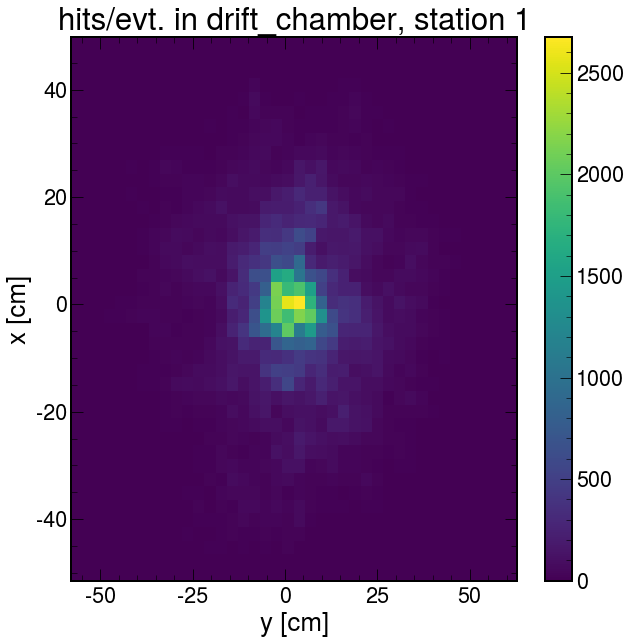

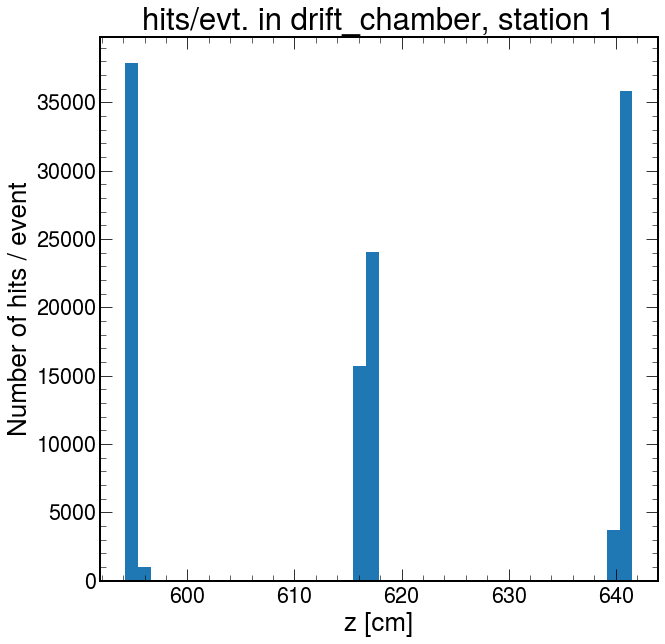

<Figure size 720x720 with 0 Axes>

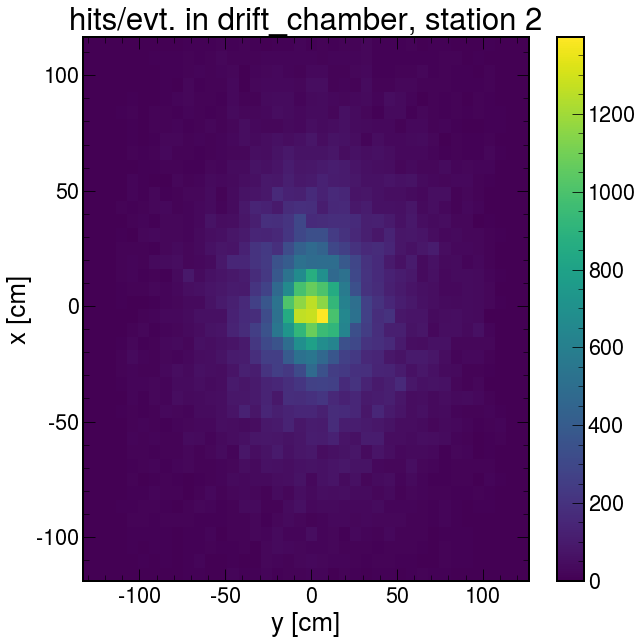

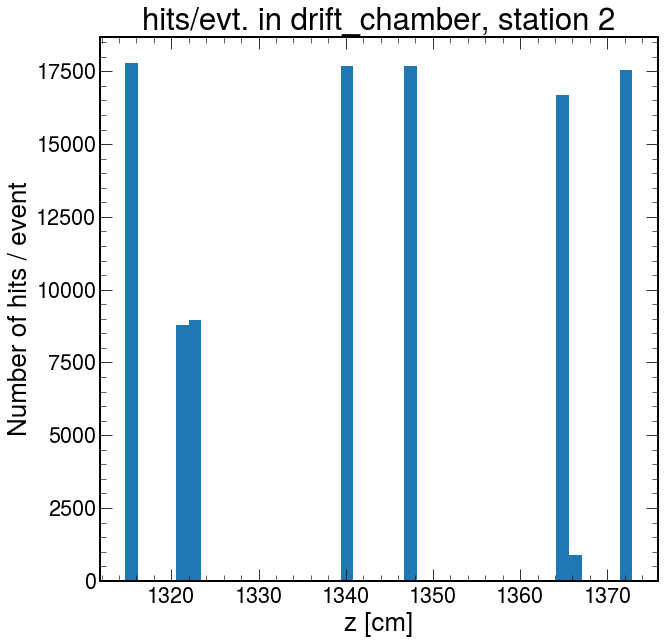

<Figure size 720x720 with 0 Axes>

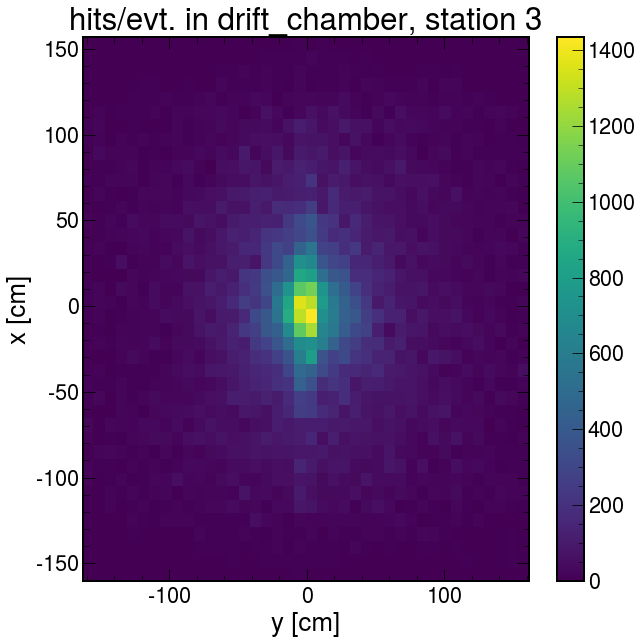

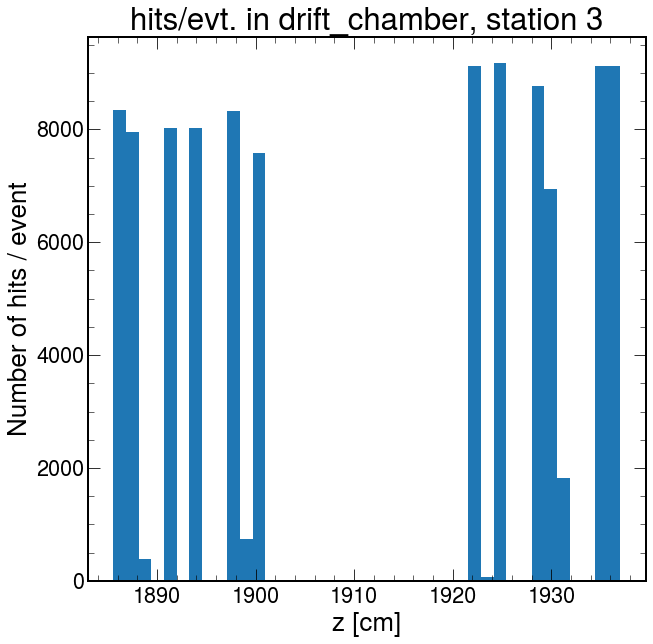

<Figure size 720x720 with 0 Axes>

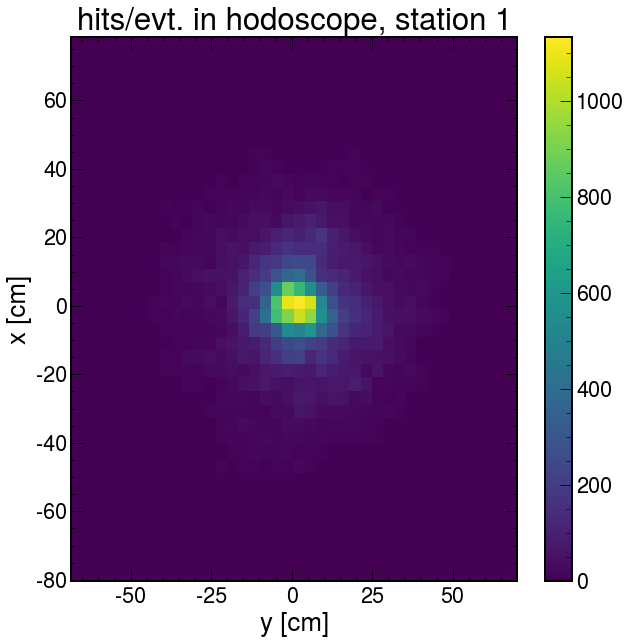

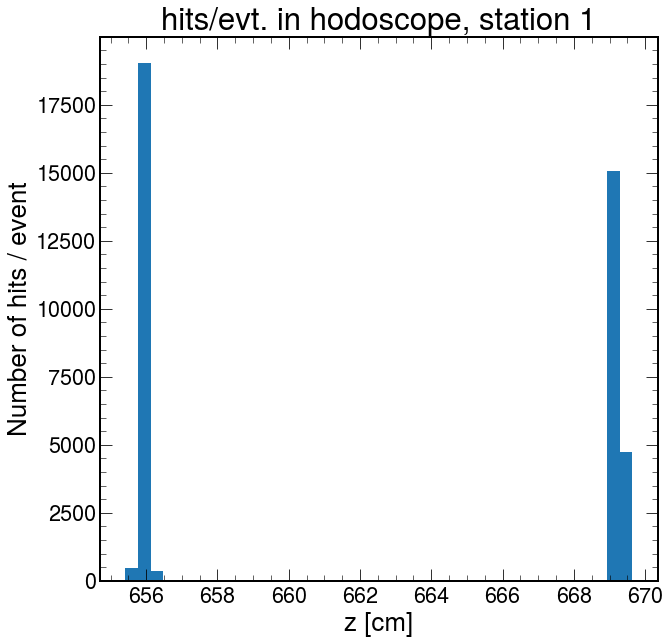

<Figure size 720x720 with 0 Axes>

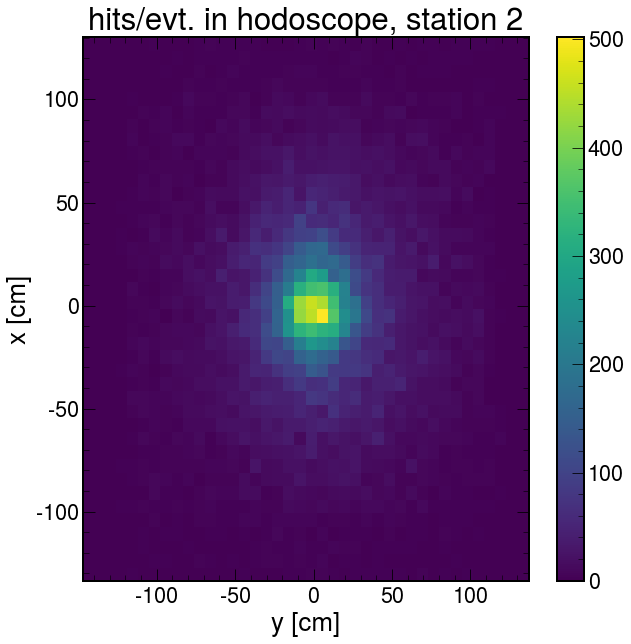

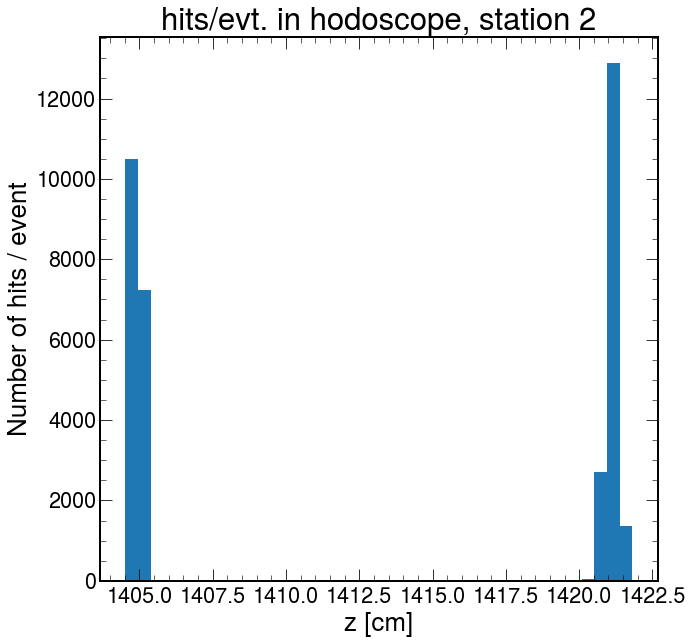

<Figure size 720x720 with 0 Axes>

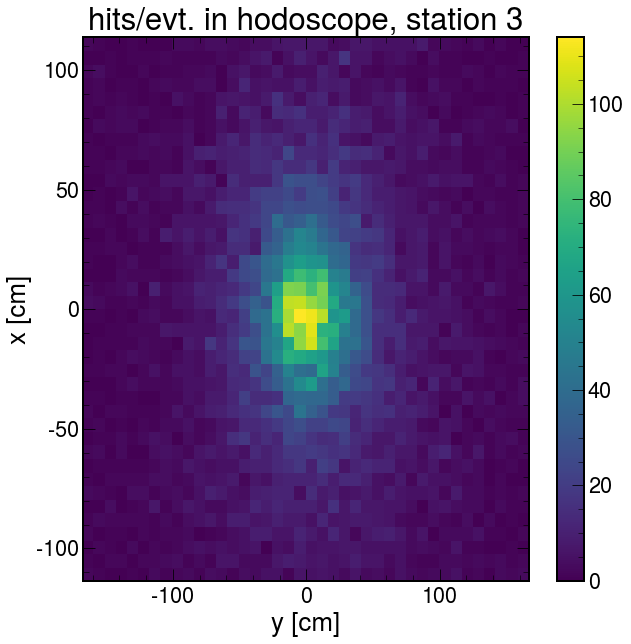

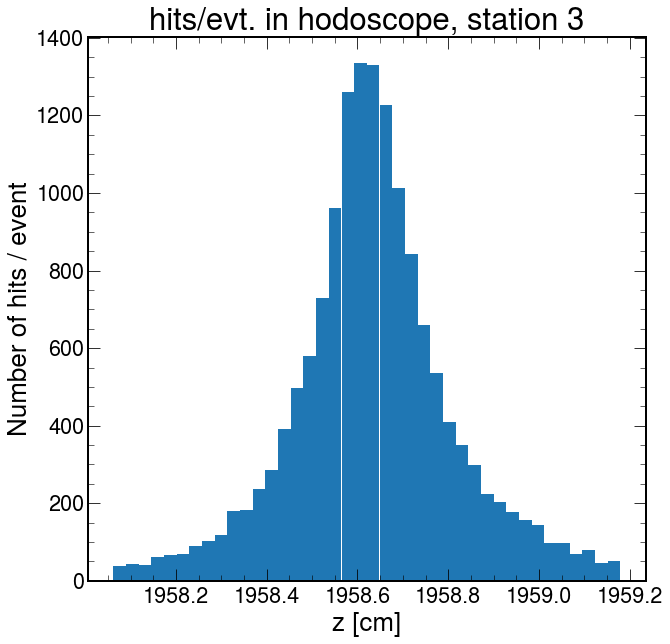

<Figure size 720x720 with 0 Axes>

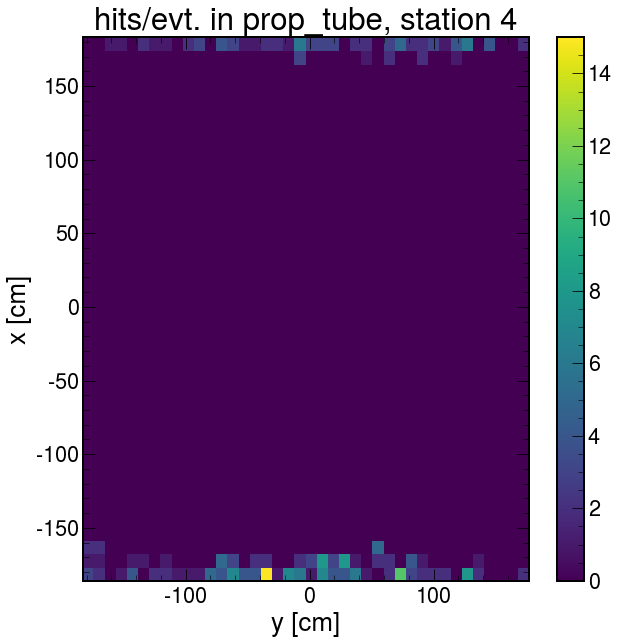

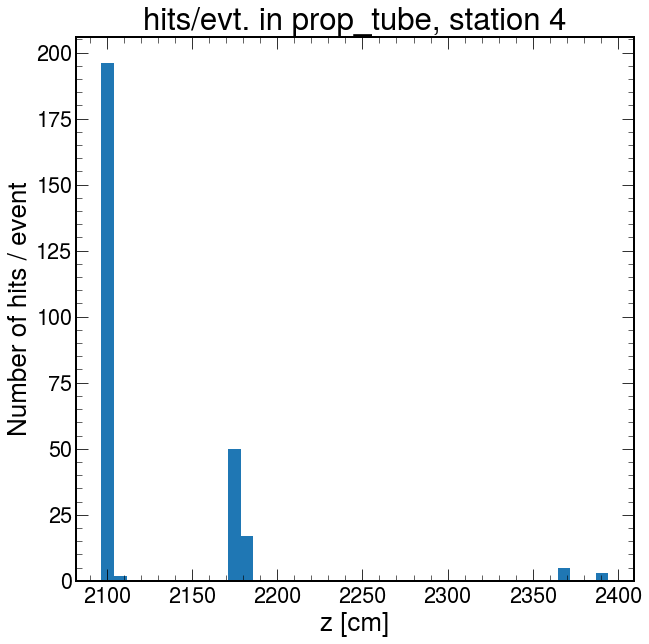

<Figure size 720x720 with 0 Axes>

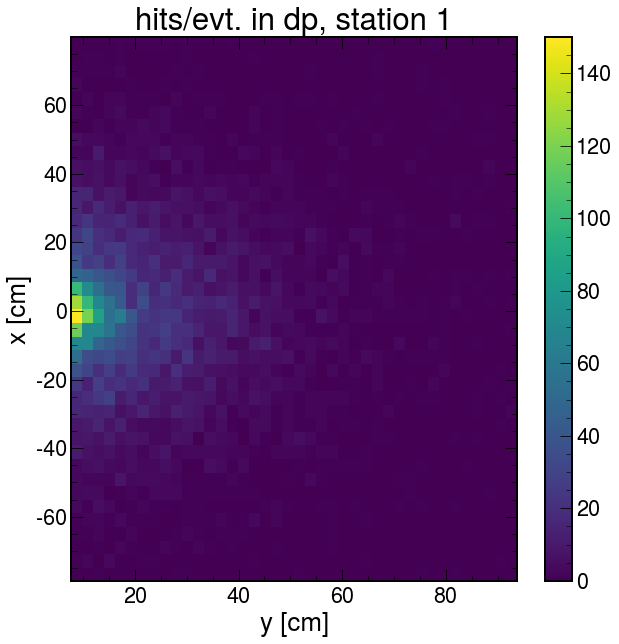

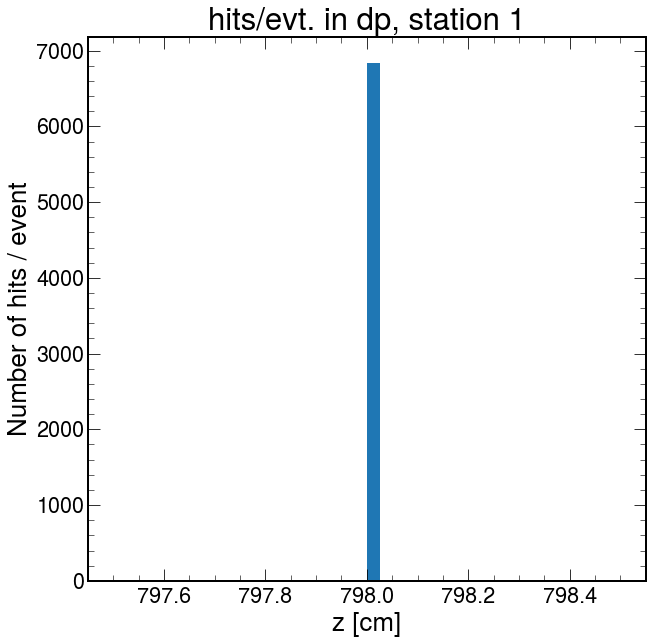

<Figure size 720x720 with 0 Axes>

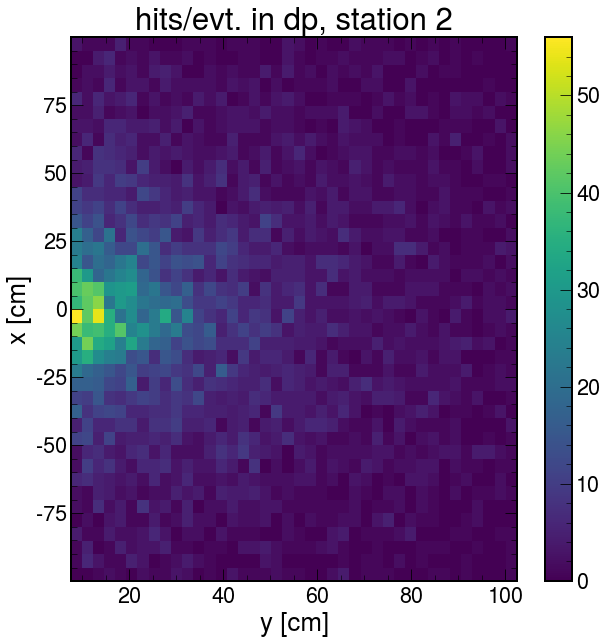

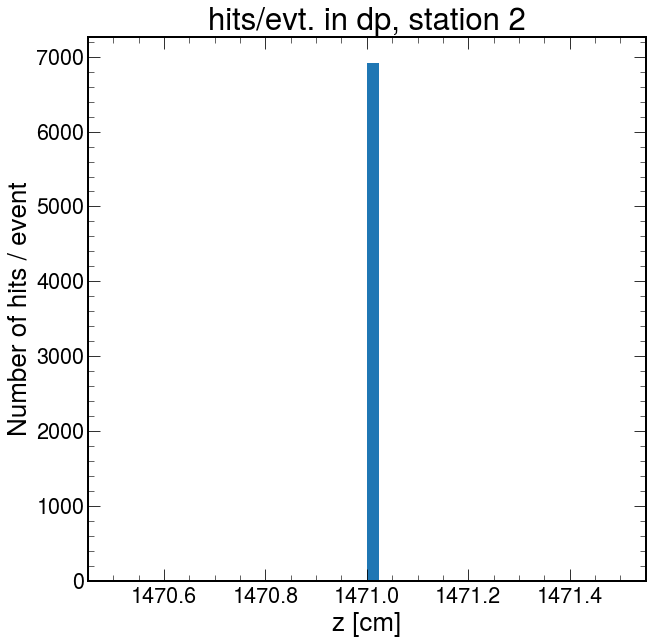

<Figure size 720x720 with 0 Axes>

In [7]:
# now we implement all masks and plot each of the variables in each of the detector pairs
for det, st in det_pairs:
    for vshort, var, vtitle in vs:
        title = "hits/evt. in " + det + ", station " + st[-1]
        savename = vshort+"_"+det+"_"+st
    
        mask = np.logical_and(masks[det],masks[st])

        # plot 
        plt.clf()
        ivars = [truth.array(v).flatten() for v in var.split(":")]
        ilabs = vtitle.split(';')
        ibins = 40
        # 2d plot
        if len(ivars)>1:
            fig, ax = plt.subplots()
            counts, xedges, yedges, im = ax.hist2d(ivars[0][mask], ivars[1][mask], bins=(ibins,ibins))
            plt.ylabel(ilabs[0])
            plt.xlabel(ilabs[1])
            plt.title(title)
            plt.colorbar(im, ax=ax)
            plt.show()
        else:
            plt.hist(ivars[0][mask], bins=ibins)
            plt.xlabel(ilabs[0])
            plt.ylabel('Number of hits / event')
            plt.title(title)
            plt.show()
            plt.clf()

Now you can try do a similar thing but add other variables, e.g. count the number of hits in one station, look at the momentum of the particles, etc.